In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#data from kaggle dataset: "Prediction of music genre"
data1 = pd.read_csv("music_genre.csv")
#data from kaggle data set: "Spotify Tracks Dataset"
data2 = pd.read_csv("dataset.csv")

# Data 1 Cleaning

In [ ]:
data1.shape

(50005, 18)

In [ ]:
data1.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [ ]:
#all the rows that are null
data1[data1['instance_id'].isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#because all the column values are none values, drop those rows
before_drop_na = len(data1)
data1 = data1.dropna()
after_drop_na = len(data1)
print("number of data dropped:", before_drop_na-after_drop_na)

number of data dropped: 5


In [ ]:
data1.shape

(50000, 18)

# What to do with Tempo column in Data 1

In [ ]:
#the tempo column in data 1 are strings with "?", therefore need to convert to integer
print(len(data1[data1["tempo"] == "?"]))
print(len(data1))

4980
50000


# Label encoding variables in data 1

In [ ]:
#make key, mode into One Hot encoding
#music_genre into label encoding
onehot = OneHotEncoder(sparse=False)
onehot.fit(data1[['key', 'mode']])
onehotencoded = onehot.transform(data1[['key', 'mode']])
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(data1[['key', 'mode']].columns) for cat in onehot.categories_[i]]
onehotdf = pd.DataFrame(onehotencoded, columns=categorical_columns)
data1 = pd.concat([data1.reset_index(), onehotdf.reset_index()], axis=1)

labelencoder = LabelEncoder()
data1['key_num'] = labelencoder.fit_transform(data1['key'])
data1['mode_num'] = labelencoder.fit_transform(data1['mode'])
data1['music_genre_num'] = labelencoder.fit_transform(data1['music_genre'])
data1

,index,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,key_num,mode_num,music_genre_num
0,0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,5
1,1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,1,5
2,2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,11,0,5
3,3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0,5
4,4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0,6
49996,50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0,6
49997,50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,0,6
49998,50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10,1,6


In [ ]:
data1_edit = data1.drop(columns = ["index", "instance_id", "artist_name", "track_name", "key", "mode", "tempo", "obtained_date", "music_genre", "key_num", "mode_num", "music_genre_num"])
features = data1_edit.columns

In [ ]:
features

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major',
       'mode_Minor'],
      dtype='object')

In [ ]:
data1_edit

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,0.759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,0.531,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,0.333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,0.270,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,0.323,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,59.0,0.03340,0.913,-1.0,0.574,0.00000,0.119,-7.022,0.2980,0.330,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49996,72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,0.0550,0.113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49997,51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,0.1460,0.395,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49998,65.0,0.08310,0.782,262773.0,0.472,0.00000,0.106,-5.016,0.0441,0.354,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Logistic Regression Baseline (Data 1)

In [ ]:
# Splitting the data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(data1[features], data1["music_genre"], test_size=0.2, random_state=1)

log_reg = LogisticRegression(max_iter=1000) 
log_reg.fit(X_train_lr, y_train_lr)

lr_test_pred = log_reg.predict(X_test_lr)

test_acc_lr = accuracy_score(y_test_lr, lr_test_pred)
train_acc_lr = accuracy_score(y_train_lr, log_reg.predict(X_train_lr))

print("Logistic Regression Accuracy (test):", test_acc_lr)
print("Logistic Regression Accuracy (train):", train_acc_lr)

Logistic Regression Accuracy (test): 0.2187
Logistic Regression Accuracy (train): 0.22195


## Attempt 1

In [ ]:
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(data1[features])

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(scaled_feat, data1["music_genre"], test_size=0.2, random_state=1)

log_reg = LogisticRegression(max_iter=1000)  
log_reg.fit(X_train_lr, y_train_lr)

lr_test_pred = log_reg.predict(X_test_lr)

test_acc_lr = accuracy_score(y_test_lr, lr_test_pred)
train_acc_lr = accuracy_score(y_train_lr, log_reg.predict(X_train_lr))

print("Logistic Regression Accuracy (test):", test_acc_lr)
print("Logistic Regression Accuracy (train):", train_acc_lr)

Logistic Regression Accuracy (test): 0.5232
Logistic Regression Accuracy (train): 0.5291


## Attempt 2

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data1[features], data1["music_genre"], test_size=0.2, random_state=1)

# Preprocessing: Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection
k = 10  # Increase the number of selected features
selector = SelectKBest(score_func=mutual_info_classif, k=k)  
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Train logistic regression model with selected features
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_selected, y_train)

# Predict on the test set
lr_test_pred = log_reg.predict(X_test_selected)

# Calculate accuracy
test_acc_lr = accuracy_score(y_test, lr_test_pred)
train_acc_lr = accuracy_score(y_train, log_reg.predict(X_train_selected))

print("Logistic Regression Accuracy (test) with feature selection:", test_acc_lr)
print("Logistic Regression Accuracy (train) with feature selection:", train_acc_lr)


Logistic Regression Accuracy (test) with feature selection: 0.5245
Logistic Regression Accuracy (train) with feature selection: 0.52455


## Attempt 3

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data1[features], data1["music_genre"], test_size=0.2, random_state=1)

# Preprocessing: Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection
k = 20  # Increase the number of selected features
selector = SelectKBest(score_func=mutual_info_classif, k=k)  
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Train logistic regression model with selected features
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_selected, y_train)

# Predict on the test set
lr_test_pred = log_reg.predict(X_test_selected)

# Calculate accuracy
test_acc_lr = accuracy_score(y_test, lr_test_pred)
train_acc_lr = accuracy_score(y_train, log_reg.predict(X_train_selected))

print("Logistic Regression Accuracy (test) with feature selection:", test_acc_lr)
print("Logistic Regression Accuracy (train) with feature selection:", train_acc_lr)


Logistic Regression Accuracy (test) with feature selection: 0.5244
Logistic Regression Accuracy (train) with feature selection: 0.5278


<Figure size 10000x8000 with 0 Axes>

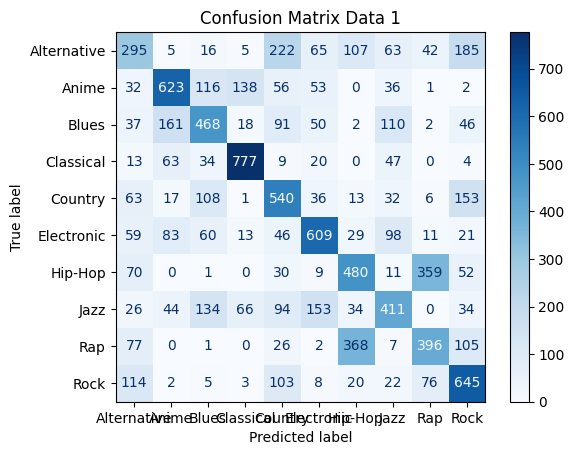

In [ ]:
cm1 = confusion_matrix(y_test, lr_test_pred)

plt.figure(figsize=(100, 80))
ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=np.unique(y_test)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Data 1')
plt.show()

In [ ]:
print("Classification Report for Data 1:")
print(classification_report(y_test, lr_test_pred))

Classification Report for Data 1:
              precision    recall  f1-score   support

 Alternative       0.38      0.29      0.33      1005
       Anime       0.62      0.59      0.61      1057
       Blues       0.50      0.48      0.49       985
   Classical       0.76      0.80      0.78       967
     Country       0.44      0.56      0.49       969
  Electronic       0.61      0.59      0.60      1029
     Hip-Hop       0.46      0.47      0.46      1012
        Jazz       0.49      0.41      0.45       996
         Rap       0.44      0.40      0.42       982
        Rock       0.52      0.65      0.57       998

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.52      0.52      0.52     10000



# Data 2 Cleaning

In [ ]:
data2.shape

(114000, 21)

In [ ]:
data2.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
#drop all the rows that are null
data2 = data2.dropna()

In [ ]:
len(data2)

113999

In [ ]:
#make track_genre into label encoding
labelencoder = LabelEncoder()
data2['track_genre_num'] = labelencoder.fit_transform(data2['track_genre'])
data2

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_num
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,113
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,113
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,113
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,113


In [ ]:
features2 = ["popularity", "duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"]
len(features2)

14

# Logistic Regression Baseline (Data 2)

In [ ]:
# Splitting the data into training and testing sets
X_train_lr2, X_test_lr2, y_train_lr2, y_test_lr2 = train_test_split(data2[features2], data2["track_genre"], test_size=0.2, random_state=1)

log_reg2 = LogisticRegression(max_iter=1000) 
log_reg2.fit(X_train_lr2, y_train_lr2)

lr_test_pred2 = log_reg2.predict(X_test_lr2)

test_acc_lr2 = accuracy_score(y_test_lr2, lr_test_pred2)
train_acc_lr2 = accuracy_score(y_train_lr2, log_reg2.predict(X_train_lr2))

print("Logistic Regression Accuracy (test):", test_acc_lr2)
print("Logistic Regression Accuracy (train):", train_acc_lr2)

Logistic Regression Accuracy (test): 0.008114035087719297
Logistic Regression Accuracy (train): 0.008936501496726939


# Attempt 1

In [ ]:
scaler2 = MinMaxScaler()
scaled_feat2 = scaler2.fit_transform(data2[features2])

X_train_lr2, X_test_lr2, y_train_lr2, y_test_lr2 = train_test_split(scaled_feat2, data2["track_genre"], test_size=0.2, random_state=1)

log_reg2 = LogisticRegression(max_iter=1000)  
log_reg2.fit(X_train_lr2, y_train_lr2)

lr_test_pred2 = log_reg2.predict(X_test_lr2)

test_acc_lr2 = accuracy_score(y_test_lr2, lr_test_pred2)
train_acc_lr2 = accuracy_score(y_train_lr2, log_reg2.predict(X_train_lr2))

print("Logistic Regression Accuracy (test):", test_acc_lr2)
print("Logistic Regression Accuracy (train):", train_acc_lr2)

Logistic Regression Accuracy (test): 0.18530701754385964
Logistic Regression Accuracy (train): 0.18866434938979595


## Attempt 2

In [ ]:

X_train2, X_test2, y_train2, y_test2 = train_test_split(data2[features2], data2["track_genre"], test_size=0.2, random_state=1)

scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)

k = 10 
selector2 = SelectKBest(score_func=mutual_info_classif, k=k) 
X_train_selected2 = selector2.fit_transform(X_train_scaled2, y_train2)
X_test_selected2 = selector2.transform(X_test_scaled2)

log_reg2 = LogisticRegression(max_iter=1000)
log_reg2.fit(X_train_selected2, y_train2)

lr_test_pred2 = log_reg2.predict(X_test_selected2)

test_acc_lr2 = accuracy_score(y_test2, lr_test_pred2)
train_acc_lr2 = accuracy_score(y_train2, log_reg2.predict(X_train_selected2))

print("Logistic Regression Accuracy (test) with feature selection:", test_acc_lr2)
print("Logistic Regression Accuracy (train) with feature selection:", train_acc_lr2)

Logistic Regression Accuracy (test) with feature selection: 0.19364035087719297
Logistic Regression Accuracy (train) with feature selection: 0.1974583054638757


## Attempt 3

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2[features2], data2["track_genre"], test_size=0.2, random_state=1)

scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)

k = 14  
selector2 = SelectKBest(score_func=mutual_info_classif, k=k)  
X_train_selected2 = selector2.fit_transform(X_train_scaled2, y_train2)
X_test_selected2 = selector2.transform(X_test_scaled2)

log_reg2 = LogisticRegression(max_iter=1000)
log_reg2.fit(X_train_selected2, y_train2)

lr_test_pred2 = log_reg2.predict(X_test_selected2)

test_acc_lr2 = accuracy_score(y_test2, lr_test_pred2)
train_acc_lr2 = accuracy_score(y_train2, log_reg2.predict(X_train_selected2))

print("Logistic Regression Accuracy (test) with feature selection:", test_acc_lr2)
print("Logistic Regression Accuracy (train) with feature selection:", train_acc_lr2)

Logistic Regression Accuracy (test) with feature selection: 0.20087719298245615
Logistic Regression Accuracy (train) with feature selection: 0.20339038805250056


<Figure size 10000x8000 with 0 Axes>

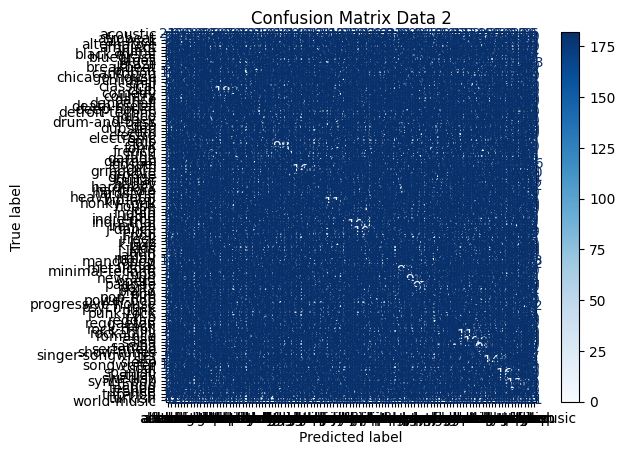

In [ ]:
cm2 = confusion_matrix(y_test2, lr_test_pred2)

plt.figure(figsize=(100, 80))
ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=np.unique(y_test2)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Data 2')
plt.show()

In [ ]:
print("Classification Report for Data 2:")
print(classification_report(y_test2, lr_test_pred2))

Classification Report for Data 2:
                   precision    recall  f1-score   support

         acoustic       0.10      0.10      0.10       214
         afrobeat       0.30      0.15      0.20       202
         alt-rock       0.00      0.00      0.00       206
      alternative       0.01      0.00      0.01       201
          ambient       0.28      0.36      0.32       192
            anime       0.02      0.01      0.01       199
      black-metal       0.34      0.44      0.38       195
        bluegrass       0.23      0.20      0.21       178
            blues       0.00      0.00      0.00       229
           brazil       0.06      0.01      0.02       206
        breakbeat       0.18      0.18      0.18       200
          british       0.25      0.01      0.02       187
         cantopop       0.15      0.14      0.15       222
    chicago-house       0.30      0.42      0.35       203
         children       0.25      0.35      0.29       201
            chill    

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3da032f1-e5ab-4726-ac09-eb3d9c053730' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>